In [246]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display

hop_length = 256
frame_length = 1024
plt.rcParams['figure.figsize'] = (13, 5)

In [247]:
import numpy, scipy, os, matplotlib, imageio
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.preprocessing import scale
from scipy.spatial import distance
from scipy.interpolate import splprep, splev
from numpy import linspace


import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import scipy.signal as sg

basefile = '/home/tejaswik/Documents/CurrentProjects/melmot/'
def ups(array):
    y = sg.resample(array,600)
    y = pd.DataFrame(y)
    return(y)

def readpitch(stri):
    fil = basefile+'sound/pitch/'+stri
    z = pd.read_csv(fil, sep='   ', engine = 'python',header =0)
    return(z)

In [248]:
pitches = []
for i in range(1,17,1):
    strings = str(i)+'.txt'
    pitches.append(ups(readpitch(strings)['F0_Hz']))

    
pitch = pd.DataFrame(pitches)
pitch.columns = ['f0']

In [249]:
def calcContEn(sound):
    fil = sound
    x, sr = librosa.load(fil)
    energy = numpy.array([sum(abs(x[i:i+frame_length]**2)) for i in range(0, len(x), hop_length)])
    rmse = librosa.feature.rmse(x)[0]
    return{'En':energy,'RMS':rmse}

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

600

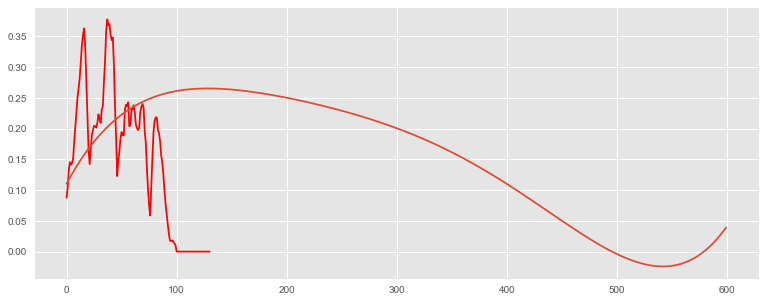

In [250]:
len(b[5])
t = range(0,len(b[5]))
plt.plot(b[5],color = 'red')
e  = upsample(b[5],t)
len(e)

In [251]:
def upsample(arr,t):
    tckp1,u1 = splprep([t,arr],s=1.0,k=5,nest = -1)
    xnew1,ynew1 = splev(linspace(0,1,600),tckp1)
    plt.plot(ynew1)
    return ynew1

In [252]:
a = []
for i in sounds:
    x, sr = librosa.load(files+i)
    fmin = librosa.midi_to_hz(36)
    hop_length = 512
    C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    spectral_centroids.shape
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    a.append(normalize(spectral_centroids))

In [253]:
for i in a:
    print len(i)

259
131
259
131
195
131
195
195
259
259
131
131
67
259
259
259
258
129
258
129
193
129
193
193
258
258
129
129
65
258
255
258


In [162]:
a = []
for i in sounds:
    x, sr = librosa.load(files+i)
    fmin = librosa.midi_to_hz(36)
    hop_length = 512
    C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    spectral_centroids.shape
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    a.append(normalize(spectral_centroids))

In [254]:
b = []
for i in sounds:
    b.append(calcContEn(files+i)['RMS'])

In [155]:
files = basefile + 'sound/music/'
sounds = os.listdir(files)

In [255]:
for i in range(0,32):
    sounds[i] = int(sounds[i][:-4])

In [256]:
sounds = sorted(sounds)

In [257]:
for i in range(0,16):
    sounds[i] = str(sounds[i])+'.mp3'
for i in range(16,32):
    sounds[i] = str(sounds[i])+'.wav'

In [258]:
sounds

['1.mp3',
 '2.mp3',
 '3.mp3',
 '4.mp3',
 '5.mp3',
 '6.mp3',
 '7.mp3',
 '8.mp3',
 '9.mp3',
 '10.mp3',
 '11.mp3',
 '12.mp3',
 '13.mp3',
 '14.mp3',
 '15.mp3',
 '16.mp3',
 '17.wav',
 '18.wav',
 '19.wav',
 '20.wav',
 '21.wav',
 '22.wav',
 '23.wav',
 '24.wav',
 '25.wav',
 '26.wav',
 '27.wav',
 '28.wav',
 '29.wav',
 '30.wav',
 '31.wav',
 '32.wav']

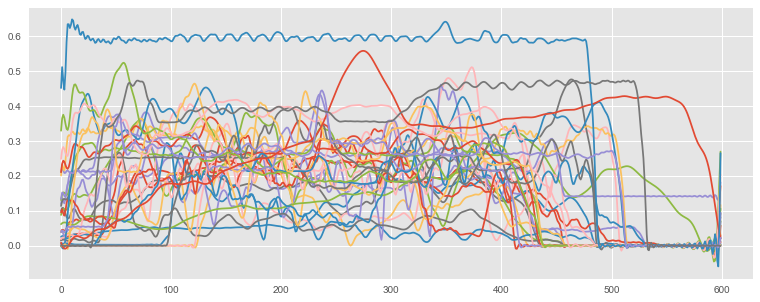

In [259]:
for i in b:
    plt.plot(ups(i))

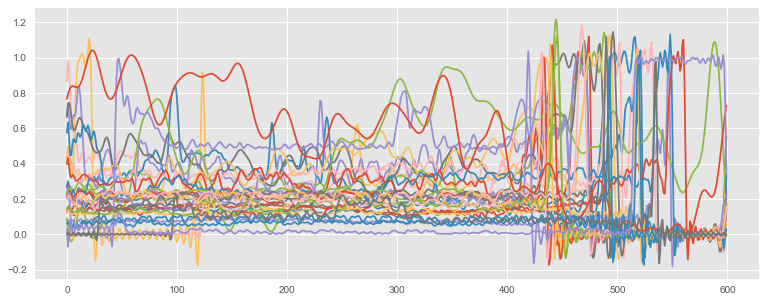

In [170]:
for i in a:
    plt.plot(ups(i))

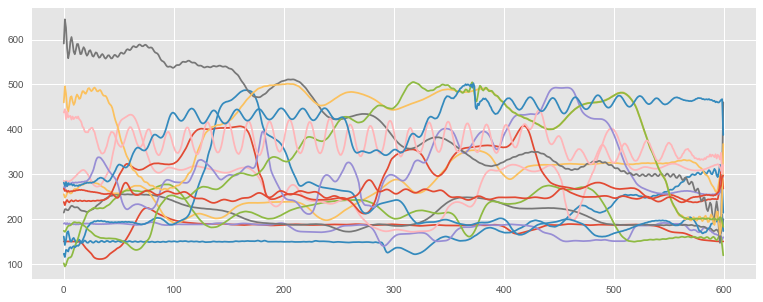

In [166]:
for i in pitches:
    plt.plot(i)

In [260]:
g = []
for i in range(0,16):
    print i
    g.append([pitches[i],ups(a[i]),ups(b[i])])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [261]:
melodies = pd.read_csv('melodies794.csv')

In [268]:
labels = numpy.array(melodies['0'])
numpy.save('melodiesLabels',labels, allow_pickle = True)

In [241]:
o = []
for i in range(0,794):
    j = melodies['0'][i]
    p = pitches[j][0].values.tolist()
    sc = ups(a[j])[0].values.tolist()
    rms = ups(b[j])[0].values.tolist()
    n = [p,sc,rms]
    g = pd.DataFrame(n)
    g = numpy.array(g.T)
    o.append(g)

In [243]:
o = numpy.array(o)

In [244]:
o.shape

(794, 600, 3)

In [245]:
numpy.save('pickle',o, allow_pickle = True)